## Project 2 Notebook - 8/12/2020

### Scott, Reuben, Javier, Sara

In [1]:
# Nasdaq Predictive Model

In [2]:
# Import Dependencies 

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [4]:
# Read in NASDAQ 1 yr Data (July 2019 - July 2020)

In [5]:
nasdaq = pd.read_csv('final-model-data.csv')

In [6]:
nasdaq.tail()

,Symbol,Date,Open,High,Low,Close,Volume
947076,TRUE,20-Jul-20,2.96,3.01,2.9,2.985,478800
947077,TRUE,21-Jul-20,3.02,3.05,2.905,2.95,813200
947078,TRUE,22-Jul-20,2.92,3,2.92,2.95,581100
947079,TRUE,23-Jul-20,2.95,2.99,2.88,2.935,424800
947080,TRUE,24-Jul-20,2.94,2.94,2.825,2.87,402000


## Cleaning the Data

In [7]:
# Change the Close column to Float

In [8]:
nasdaq_2 = nasdaq[nasdaq['Close']!= 'Close']

In [9]:
# Change the Close column values from objects to a floats

In [10]:
nasdaq_2['Close2'] = nasdaq_2['Close'].astype(float)

In [11]:
# One of the rows is named "Close" the 'for_loop' below idenifies that problem

In [12]:
for c_value in nasdaq['Close']:
    if (type(c_value)== str):
        print(c_value)

.374
26.2946
26.3627
26.3738
26.4422
26.3
26.56
26.45
26.45
26.5235
26.59
26.5
26.5
26.4
26.4
26.6093
26.575
26.45
26.35
26.328
26.5634
26.5075
26.53
26.53
26.53
26.3136
26.08
25.9953
26.0001
25.88
25.85
25.9918
25.9626
25.9626
25.9626
25.95
26.14
25.9377
25.95
26.05
25.9
25.9763
25.945
25.75
26.11
25.84
25.85
25.85
26.0514
26
26
26.05
26.05
26.38
26.461
26.326
26.326
26.326
26.326
26.35
26.35
26.427
26.427
26.427
26.427
26.427
26.4347
26.3611
26.3803
26.2
26.2
26.35
26.35
26.5718
26.4403
26.3711
26.55
26.6992
26.35
26.35
26.55
26.425
26.528
26.6479
26.5
26.5
26.5
26.41
26.69
26
26
26.1358
26.25
26.5768
26.5768
26.5509
26.5
25.8
25.84
25.45
25.45
25.45
25.76
25.456
25.97
25.6
25.8536
25.4
23.6
23.96
23.756
22.08
19.42
18.4089
20
19.98
21
21.5
23.7075
22.64
22.5
21.5
21.5
20.5
20.2
22.015
20.7686
21.25
22
22
21.95
24
22.275
21.5
21.8085
21.8085
22.48
22.5
22.5
22.7227
23
23.0001
24
24
24
22.77
24
23.625
23.75
23.7892
24
24.95
24.74
22.5
22.5
23.4
23.44
24.05
24
24
24
23.7
23.5177
24.33


In [13]:
# Take the Nasdaq dataframe and drop all columns except "Close2"...one with the float values

In [14]:
nasdaq_2.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'], inplace=True)
nasdaq_2.tail()

,Symbol,Date,Close2
947076,TRUE,20-Jul-20,2.985
947077,TRUE,21-Jul-20,2.950
947078,TRUE,22-Jul-20,2.950
947079,TRUE,23-Jul-20,2.935
947080,TRUE,24-Jul-20,2.870


In [15]:
nasdaq_2.set_index(['Symbol', 'Date'], inplace =True)

In [16]:
nasdaq_2 = nasdaq_2.groupby('Symbol').pct_change()

In [17]:
nasdaq_2.head()

Close2
Symbol Date               
AACG   17-Oct-19       NaN
       18-Oct-19 -0.037989
       21-Oct-19  0.028247
       22-Oct-19 -0.022032
       23-Oct-19  0.028034

In [18]:
# Drop NaN values and Rename columns to clean up Dataframe, then sort the dates

In [19]:
nasdaq_2 = nasdaq_2.dropna()

In [20]:
nasdaq_2 = nasdaq_2.rename(columns={'Close2': 'Returns'})

In [21]:
nasdaq_2 = nasdaq_2.sort_values('Date')

In [22]:
nasdaq_2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 943004 entries, (SCHN, 1-Apr-20) to (DOMO, 9-Sep-19)
Data columns (total 1 columns):
Returns    943004 non-null float64
dtypes: float64(1)
memory usage: 10.8+ MB


## Cleaned DataFrame - Ticker, Date, Returns by Day

In [23]:
nasdaq_2.head()

,,Returns
Symbol,Date,
SCHN,1-Apr-20,-0.039877
FIVN,1-Apr-20,-0.035574
PFBC,1-Apr-20,-0.071851
SALM,1-Apr-20,-0.116382
JCS,1-Apr-20,-0.044843


In [24]:
#nasdaq = pd.read_csv('final-model-data.csv')

In [25]:
#nasdaq.drop(columns=['Open', 'High', 'Low', 'Volume'], inplace=True)

In [26]:
#nasdaq_closed = nasdaq[nasdaq['Close']!= 'Close']
#nasdaq_closed['Close'] = nasdaq_closed['Close'].astype(float)

In [27]:
#nasdaq_closed.set_index(['Symbol', 'Date'], inplace =True)

In [28]:
#nasdaq_cleaned = pd.merge(nasdaq_closed, nasdaq_2, left_index=True, right_index=True, how='outer')

In [29]:
#nasdaq_cleaned.head()

In [30]:
#temp_df = nasdaq_cleaned[nasdaq_cleaned['Symbol']==AACG]
#temp_df = nasdaq_cleaned[nasdaq_cleaned.index.get_level_vaues()==AACG]

## Random Forest Model Creation

In [31]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
nasdaq_2['fast_close'] = nasdaq_2['Returns'].ewm(halflife=short_window).mean()
nasdaq_2['slow_close'] = nasdaq_2['Returns'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
nasdaq_2['crossover_long'] = np.where(nasdaq_2['fast_close'] > nasdaq_2['slow_close'], 1.0, 0.0)
nasdaq_2['crossover_short'] = np.where(nasdaq_2['fast_close'] < nasdaq_2['slow_close'], -1.0, 0.0)
nasdaq_2['crossover_signal'] = nasdaq_2['crossover_long'] + nasdaq_2['crossover_short']

nasdaq_2.head()

,,Returns,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Symbol,Date,,,,,,
SCHN,1-Apr-20,-0.039877,-0.039877,-0.039877,0.0,0.0,0.0
FIVN,1-Apr-20,-0.035574,-0.037009,-0.037651,1.0,0.0,1.0
PFBC,1-Apr-20,-0.071851,-0.056919,-0.049850,0.0,-1.0,-1.0
SALM,1-Apr-20,-0.116382,-0.088632,-0.068250,0.0,-1.0,-1.0
JCS,1-Apr-20,-0.044843,-0.066031,-0.062898,0.0,-1.0,-1.0


## Plot the Nasdaq closing, fast & slow moving average prices

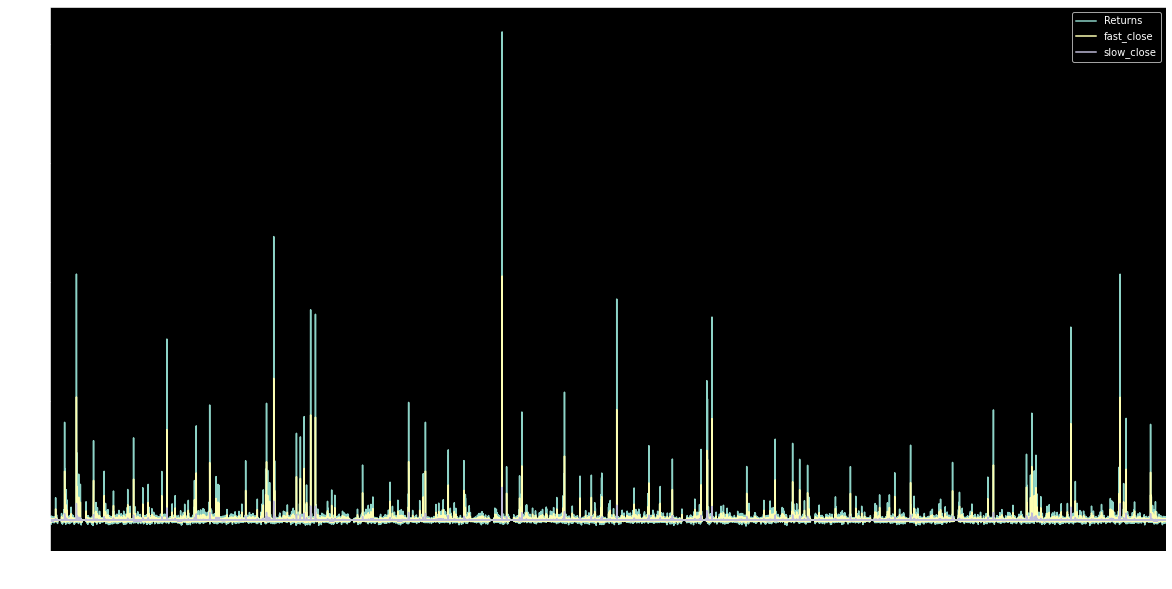

In [33]:
nasdaq_2[['Returns', 'fast_close', 'slow_close']].plot(kind='line', figsize=(20,10))
#nasdaq_2[['Returns']].plot(kind='line', figsize=(20,10))

## Set the short term and long term MA volatility windows

In [34]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
nasdaq_2['fast_vol'] = nasdaq_2['Returns'].ewm(halflife=short_vol_window).std()
nasdaq_2['slow_vol'] = nasdaq_2['Returns'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
nasdaq_2['vol_trend_long'] = np.where(nasdaq_2['fast_vol'] < nasdaq_2['slow_vol'], 1.0, 0.0)
nasdaq_2['vol_trend_short'] = np.where(nasdaq_2['fast_vol'] > nasdaq_2['slow_vol'], -1.0, 0.0) 
nasdaq_2['vol_trend_signal'] = nasdaq_2['vol_trend_long'] + nasdaq_2['vol_trend_short']

nasdaq_2.head()

,,Returns,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Symbol,Date,,,,,,,,,,,
SCHN,1-Apr-20,-0.039877,-0.039877,-0.039877,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
FIVN,1-Apr-20,-0.035574,-0.037009,-0.037651,1.0,0.0,1.0,0.003043,0.003043,0.0,-1.0,-1.0
PFBC,1-Apr-20,-0.071851,-0.056919,-0.049850,0.0,-1.0,-1.0,0.022877,0.020191,0.0,-1.0,-1.0
SALM,1-Apr-20,-0.116382,-0.088632,-0.068250,0.0,-1.0,-1.0,0.040480,0.038020,0.0,-1.0,-1.0
JCS,1-Apr-20,-0.044843,-0.066031,-0.062898,0.0,-1.0,-1.0,0.038820,0.034158,0.0,-1.0,-1.0


## Bollinger Band Window

In [35]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
nasdaq_2['bollinger_mid_band'] = nasdaq_2['Returns'].rolling(window=bollinger_window).mean()
nasdaq_2['bollinger_std'] = nasdaq_2['Returns'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
nasdaq_2['bollinger_upper_band']  = nasdaq_2['bollinger_mid_band'] + (nasdaq_2['bollinger_std'] * 1)
nasdaq_2['bollinger_lower_band']  = nasdaq_2['bollinger_mid_band'] - (nasdaq_2['bollinger_std'] * 1)

# Calculate bollinger band trading signal
nasdaq_2['bollinger_long'] = np.where(nasdaq_2['Returns'] < nasdaq_2['bollinger_lower_band'], 1.0, 0.0)
nasdaq_2['bollinger_short'] = np.where(nasdaq_2['Returns'] > nasdaq_2['bollinger_upper_band'], -1.0, 0.0)
nasdaq_2['bollinger_signal'] = nasdaq_2['bollinger_long'] + nasdaq_2['bollinger_short']

nasdaq_2.head()

,,Returns,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Symbol,Date,,,,,,,,,,,,,,,,,,
SCHN,1-Apr-20,-0.039877,-0.039877,-0.039877,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
FIVN,1-Apr-20,-0.035574,-0.037009,-0.037651,1.0,0.0,1.0,0.003043,0.003043,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
PFBC,1-Apr-20,-0.071851,-0.056919,-0.049850,0.0,-1.0,-1.0,0.022877,0.020191,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
SALM,1-Apr-20,-0.116382,-0.088632,-0.068250,0.0,-1.0,-1.0,0.040480,0.038020,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
JCS,1-Apr-20,-0.044843,-0.066031,-0.062898,0.0,-1.0,-1.0,0.038820,0.034158,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [36]:
# Set x variable list of features
x_var_list = ['crossover_signal', 'vol_trend_signal', 'bollinger_signal']

# Filter by x-variable list
nasdaq_2[x_var_list].head()

,,crossover_signal,vol_trend_signal,bollinger_signal
Symbol,Date,,,
SCHN,1-Apr-20,0.0,0.0,0.0
FIVN,1-Apr-20,1.0,-1.0,0.0
PFBC,1-Apr-20,-1.0,-1.0,0.0
SALM,1-Apr-20,-1.0,-1.0,0.0
JCS,1-Apr-20,-1.0,-1.0,0.0


## Shift the DataFrame by 1 day to calculate predicted returns from the previous day 

In [37]:
# Shift DataFrame values by 1
nasdaq_2[x_var_list] = nasdaq_2[x_var_list].shift(1)
nasdaq_2[x_var_list].tail()

,,crossover_signal,vol_trend_signal,bollinger_signal
Symbol,Date,,,
KFRC,9-Sep-19,-1.0,1.0,0.0
WYNN,9-Sep-19,-1.0,1.0,0.0
STOK,9-Sep-19,1.0,1.0,0.0
VTGN,9-Sep-19,-1.0,-1.0,1.0
DOMO,9-Sep-19,-1.0,-1.0,0.0


In [38]:
# Drop NAs and replace positive/negative infinity values

nasdaq_2.dropna(subset=x_var_list, inplace=True)
nasdaq_2.dropna(subset=['Returns'], inplace=True)
nasdaq_2 = nasdaq_2.replace([np.inf, -np.inf], np.nan)
nasdaq_2.head()

,,Returns,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Symbol,Date,,,,,,,,,,,,,,,,,,
FIVN,1-Apr-20,-0.035574,-0.037009,-0.037651,1.0,0.0,0.0,0.003043,0.003043,0.0,-1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
PFBC,1-Apr-20,-0.071851,-0.056919,-0.049850,0.0,-1.0,1.0,0.022877,0.020191,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
SALM,1-Apr-20,-0.116382,-0.088632,-0.068250,0.0,-1.0,-1.0,0.040480,0.038020,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
JCS,1-Apr-20,-0.044843,-0.066031,-0.062898,0.0,-1.0,-1.0,0.038820,0.034158,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
CIVB,1-Apr-20,-0.086898,-0.076630,-0.067622,0.0,-1.0,-1.0,0.029917,0.031774,1.0,0.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


## Construct the dependent variable - daily returns greater than 0 == 1, else returns == 0

In [39]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
# Changing the target variable away from 0 introduces the problem of an imbalanced dataset

nasdaq_2['Positive Return'] = np.where(nasdaq_2['Returns'] > 0, 1.0, 0.0)
nasdaq_2.dropna(inplace=True)

In [40]:
nasdaq_3 = nasdaq_2.copy()
len(nasdaq_3)

942985

In [41]:
# Create Target list column and Loop through the rows to find values that had over 5% jump in returns for the previous day

In [42]:
target_list = []
stoprw = len(nasdaq_3)
for rw in range(stoprw):
    if rw != stoprw:
        rwn = rw  
        if nasdaq_3['Returns'][rwn]> 0.02:
            target_list.append(1)
        else:
            target_list.append(0)
    else: 
        print("hit!")
        target_list.append(0)
nasdaq_3['Target'] = target_list

In [43]:
# Check to make sure Dataframe has all 900,000 values from the dataset

In [44]:
len(target_list)

942985

In [45]:
len(nasdaq_3)

942985

In [46]:
nasdaq_3['Target'] = target_list

## NASDAQ_4 ???

In [47]:
nasdaq_4 = nasdaq_3.drop(['Returns','Positive Return'], axis=1)
nasdaq_4.head(3)

,,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Target
Symbol,Date,,,,,,,,,,,,,,,,,,
BEAM,1-Apr-20,-0.098930,-0.070467,0.0,-1.0,-1.0,0.050345,0.060417,1.0,0.0,-1.0,-0.064598,0.055151,-0.009447,-0.119750,0.0,0.0,0.0,0
DAKT,1-Apr-20,-0.101189,-0.073347,0.0,-1.0,-1.0,0.035707,0.058448,1.0,0.0,1.0,-0.067777,0.055483,-0.012295,-0.123260,0.0,0.0,0.0,0
HYACW,1-Apr-20,-0.050595,-0.067069,1.0,0.0,-1.0,0.066912,0.059690,0.0,-1.0,1.0,-0.065998,0.057115,-0.008883,-0.123114,0.0,-1.0,0.0,0


In [48]:
# Look to see if the values need to be Standardized....all columns should be between 0 and 1.

In [49]:
nasdaq_4.max()

fast_close              40.974025
slow_close               5.488104
crossover_long           1.000000
crossover_short          0.000000
crossover_signal         1.000000
fast_vol                50.179894
slow_vol                20.847752
vol_trend_long           1.000000
vol_trend_short          0.000000
vol_trend_signal         1.000000
bollinger_mid_band       4.101838
bollinger_std           18.323982
bollinger_upper_band    22.424433
bollinger_lower_band     0.050527
bollinger_long           1.000000
bollinger_short          0.000000
bollinger_signal         1.000000
Target                   1.000000
dtype: float64

In [50]:
nasdaq_4.min()

fast_close             -6.010646e-01
slow_close             -1.913387e-01
crossover_long          0.000000e+00
crossover_short        -1.000000e+00
crossover_signal       -1.000000e+00
fast_vol                0.000000e+00
slow_vol                8.036743e-54
vol_trend_long          0.000000e+00
vol_trend_short        -1.000000e+00
vol_trend_signal       -1.000000e+00
bollinger_mid_band     -2.253245e-01
bollinger_std           0.000000e+00
bollinger_upper_band   -9.660491e-02
bollinger_lower_band   -1.422802e+01
bollinger_long          0.000000e+00
bollinger_short        -1.000000e+00
bollinger_signal       -1.000000e+00
Target                  0.000000e+00
dtype: float64

In [51]:
nv = ['fast_close', 'slow_close', 'fast_vol','slow_vol', 'bollinger_mid_band', 'bollinger_std', 'bollinger_upper_band']

## Standardize columns 

In [52]:
nas = nasdaq_4.copy()
stdrd = nasdaq_4[nv]
#standardizing using min max scaler
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler()
x_unstdrd = stdrd.values
x_stdrd = minmax.fit_transform(x_unstdrd)
nas[nv] = x_stdrd

## Training the Model 

In [54]:
# Construct training start and end dates
training_start = '2019-Jun-01'
training_end = '2020-Apr-29'
# Construct testing start and end dates
testing_start =  '2020-Apr-30'
testing_end = '2020-Jul-24'
# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2019-Jun-01
Training End: 2020-Apr-29
Testing Start: 2020-Apr-30
Testing End: 2020-Jul-24


In [55]:
# Target Variable
y = nas['Target']

In [56]:
X = nas.drop(['Target'],inplace=True, axis=1)
X = nas

In [57]:
X.columns

Index(['fast_close', 'slow_close', 'crossover_long', 'crossover_short',
       'crossover_signal', 'fast_vol', 'slow_vol', 'vol_trend_long',
       'vol_trend_short', 'vol_trend_signal', 'bollinger_mid_band',
       'bollinger_std', 'bollinger_upper_band', 'bollinger_lower_band',
       'bollinger_long', 'bollinger_short', 'bollinger_signal'],
      dtype='object')

In [58]:
y

Symbol  Date    
BEAM    1-Apr-20    0
DAKT    1-Apr-20    0
HYACW   1-Apr-20    0
GENE    1-Apr-20    0
ESLT    1-Apr-20    0
JCOM    1-Apr-20    0
NDRA    1-Apr-20    0
VYGR    1-Apr-20    0
AEMD    1-Apr-20    0
SAGE    1-Apr-20    0
PSCI    1-Apr-20    0
TCF     1-Apr-20    0
CINF    1-Apr-20    0
NDRAW   1-Apr-20    0
NCSM    1-Apr-20    0
ESGU    1-Apr-20    0
NBSE    1-Apr-20    0
SAMG    1-Apr-20    0
BCYC    1-Apr-20    1
NBTB    1-Apr-20    0
PFBI    1-Apr-20    0
ESGRP   1-Apr-20    0
GEVO    1-Apr-20    0
DAIO    1-Apr-20    0
TCCO    1-Apr-20    0
SAMAW   1-Apr-20    0
VWOB    1-Apr-20    0
FCAP    1-Apr-20    0
CIZN    1-Apr-20    0
CAMP    1-Apr-20    0
                   ..
FPXE    9-Sep-19    0
LPCN    9-Sep-19    1
WRLSR   9-Sep-19    0
BJRI    9-Sep-19    1
BCPC    9-Sep-19    1
TWOU    9-Sep-19    1
NEO     9-Sep-19    0
ALDX    9-Sep-19    0
PMTS    9-Sep-19    0
NXTG    9-Sep-19    0
WABC    9-Sep-19    1
CMLS    9-Sep-19    1
TMSR    9-Sep-19    1
LSXMA   9-Sep-1

In [59]:
# Check the Test data points 

#tst = nas[nas['Target']== 1]
#len(tst)

In [60]:
# Construct the X_train and y_train datasets
X_train = X.iloc[0:660102]
y_train = y.iloc[0:660102]

X_train

,,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Symbol,Date,,,,,,,,,,,,,,,,,
BEAM,1-Apr-20,0.012078,0.021282,0.0,-1.0,-1.0,0.001003,0.002898,1.0,0.0,-1.0,0.037144,0.003010,0.003870,-0.119750,0.0,0.0,0.0
DAKT,1-Apr-20,0.012023,0.020775,0.0,-1.0,-1.0,0.000712,0.002804,1.0,0.0,1.0,0.036409,0.003028,0.003744,-0.123260,0.0,0.0,0.0
HYACW,1-Apr-20,0.013240,0.021881,1.0,0.0,-1.0,0.001333,0.002863,0.0,-1.0,1.0,0.036820,0.003117,0.003895,-0.123114,0.0,-1.0,0.0
GENE,1-Apr-20,0.011772,0.020318,0.0,-1.0,1.0,0.001763,0.003095,0.0,-1.0,-1.0,0.035655,0.003378,0.003884,-0.132947,1.0,0.0,-1.0
ESLT,1-Apr-20,0.012580,0.020776,0.0,-1.0,-1.0,0.001492,0.002993,0.0,-1.0,-1.0,0.036486,0.003341,0.004013,-0.128664,0.0,0.0,1.0
JCOM,1-Apr-20,0.012429,0.020529,0.0,-1.0,-1.0,0.001066,0.002876,1.0,0.0,-1.0,0.035957,0.003339,0.003910,-0.130917,0.0,0.0,0.0
NDRA,1-Apr-20,0.012741,0.020759,1.0,0.0,-1.0,0.000817,0.002765,1.0,0.0,1.0,0.036286,0.003334,0.003969,-0.129404,0.0,0.0,0.0
VYGR,1-Apr-20,0.012153,0.020107,0.0,-1.0,1.0,0.000830,0.002723,1.0,0.0,1.0,0.036098,0.003367,0.003960,-0.130826,0.0,0.0,0.0
AEMD,1-Apr-20,0.012039,0.019720,0.0,-1.0,-1.0,0.000598,0.002640,1.0,0.0,1.0,0.035064,0.003322,0.003725,-0.134467,0.0,0.0,0.0


In [61]:
y_train.tail()

Symbol  Date     
FFIC    29-Jul-19    0
CYRXW   29-Jul-19    0
ADP     29-Jul-19    0
BPRN    29-Jul-19    0
ISNS    29-Jul-19    0
Name: Target, dtype: int64

In [62]:
X_test = X.iloc[660103:]
y_test = y.iloc[660103:]

X_test.tail()

,,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Symbol,Date,,,,,,,,,,,,,,,,,
KFRC,9-Sep-19,0.014561,0.035843,0.0,-1.0,-1.0,0.000451,0.001937,1.0,0.0,1.0,0.054647,0.002363,0.006707,-0.032165,0.0,0.0,0.0
WYNN,9-Sep-19,0.014856,0.036039,1.0,0.0,-1.0,0.000437,0.001882,1.0,0.0,1.0,0.055860,0.002086,0.006715,-0.021840,0.0,0.0,0.0
STOK,9-Sep-19,0.013956,0.035195,0.0,-1.0,1.0,0.000964,0.002017,0.0,-1.0,1.0,0.055257,0.002264,0.006744,-0.027700,1.0,0.0,0.0
VTGN,9-Sep-19,0.014473,0.035355,0.0,-1.0,-1.0,0.000860,0.001955,0.0,-1.0,-1.0,0.055474,0.002262,0.006784,-0.026727,0.0,0.0,1.0
DOMO,9-Sep-19,0.014602,0.035378,0.0,-1.0,-1.0,0.000622,0.001889,1.0,0.0,-1.0,0.055606,0.002255,0.006803,-0.026020,0.0,0.0,0.0


In [63]:
## Finalize the Model and Train data

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [65]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results

,,Target,Predicted Value
Symbol,Date,,
EMKR,29-Jul-19,0,0
FLMNW,29-Jul-19,0,0
HBCP,29-Jul-19,0,0
PSCH,29-Jul-19,0,0
LORL,29-Jul-19,1,1
NBEV,29-Jul-19,0,0
SPRT,29-Jul-19,0,0
IMBI,29-Jul-19,0,0
BFST,29-Jul-19,0,0


In [66]:
Results.dtypes

Target             int64
Predicted Value    int64
dtype: object

In [67]:
Results.tail()

,,Target,Predicted Value
Symbol,Date,,
KFRC,9-Sep-19,0,0
WYNN,9-Sep-19,1,0
STOK,9-Sep-19,0,0
VTGN,9-Sep-19,1,0
DOMO,9-Sep-19,0,0


## Print the Confusion Matrix and Classification Report to see how the Model performs

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
confusion_matrix(Results['Target'], Results['Predicted Value'])

array([[223806,   3296],
       [ 21488,  34292]])

In [70]:
print(classification_report(Results['Target'], Results['Predicted Value']))

precision    recall  f1-score   support

           0       0.91      0.99      0.95    227102
           1       0.91      0.61      0.73     55780

    accuracy                           0.91    282882
   macro avg       0.91      0.80      0.84    282882
weighted avg       0.91      0.91      0.91    282882



In [72]:
importances = model.feature_importances_
importances

array([0.29606045, 0.08066499, 0.08172887, 0.09180067, 0.00734749,
       0.01049065, 0.0016039 , 0.01137642, 0.01289092, 0.00457886,
       0.03649396, 0.00282111, 0.04110576, 0.00291466, 0.00502408,
       0.31091783, 0.00217939])

In [74]:
importances_df = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True) 
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

In [75]:
importances_df

,Feature Importances
1,
bollinger_short,0.310918
fast_close,0.296060
crossover_short,0.091801
crossover_long,0.081729
slow_close,0.080665
bollinger_upper_band,0.041106
bollinger_mid_band,0.036494
vol_trend_short,0.012891
vol_trend_long,0.011376


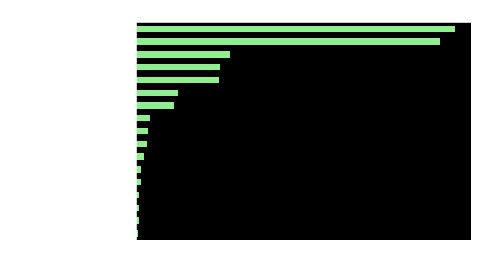

In [76]:
# Sort importances
importances_sorted = importances_df.sort_values(by='Feature Importances')

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [86]:
Results.reset_index(inplace=True)

In [91]:
Results_final = Results.groupby('Symbol').first()

,Date,Target,Predicted Value
Symbol,,,
AACG,29-Jun-20,0,0
AAL,29-Jun-20,1,1
AAME,29-Jul-19,1,1
AAOI,29-Jul-19,0,0
AAON,29-Jul-19,0,0
...,...,...,...
ZSAN,29-Jul-19,0,0
ZUMZ,29-Jul-19,0,0
ZVO,29-Jul-19,0,0


In [ ]:
Results_final

In [69]:
import boto3
from os import environ as env
env['SNS_ARN'] = 'arn:aws:sns:us-west-2:585222384446:GroupProject'

In [70]:
def publish_message_sns(message):
    """
    :param message: str: message to be sent to SNS
    :return: None
    """
    sns_arn = env.get('SNS_ARN').strip()
    sns_client = boto3.client('sns')
    try:
        response = sns_client.publish(
            TopicArn=sns_arn,
            Message=message
        )
    except Exception as e:
        print(f"ERROR PUBLISHING MESSAGE TO SNS: {e}")

In [71]:
message = 'test'
publish_message_sns(message)